# Explorando rotas

In [2]:
import numpy as np
import pandas as pd
import requests

r = requests.get('https://covid19-brazil-api.now.sh/api/report/v1')
data = r.json()


## Dados atualizados - 26/03/2020

In [3]:
col = list(data['data'][0].keys())[:-1]
aux = []
for i in data['data']:
    aux.append(np.array(list(i.values())[:-1]))

data = pd.DataFrame(data=np.array(aux),columns=col)    
data

,uid,uf,state,cases,deaths,suspects,refuses
0,35,SP,São Paulo,1406,84,5334,596
1,33,RJ,Rio de Janeiro,558,13,1254,148
2,23,CE,Ceará,314,4,493,89
3,53,DF,Distrito Federal,260,0,327,107
4,31,MG,Minas Gerais,205,0,925,104
5,43,RS,Rio Grande do Sul,197,2,416,330
6,42,SC,Santa Catarina,184,1,346,47
7,41,PR,Paraná,133,2,400,119
8,29,BA,Bahia,128,0,573,36
9,13,AM,Amazonas,111,1,18,26


## Definir intervalo de temo mínimo pra análise

In [4]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 2, 26)
end_dt = date(2020, 3, 26)
dates = []

for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%Y%m%d"))

dates

['20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',
 '20200318',
 '20200319',
 '20200320',
 '20200321',
 '20200322',
 '20200323',
 '20200324',
 '20200325',
 '20200326']

In [5]:
GERAL = []
datas_ = []

for dt in dates:
    aux = np.array(requests.get('https://covid19-brazil-api.now.sh/api/report/v1/brazil/'+dt).json()['data'])
    data_aux = []
    for i in aux:
        GERAL.append(i)
        datas_.append(dt)


In [6]:
tudo = []

for i in range(len(GERAL)):
    tudo.append(np.array([datas_[i],GERAL[i]['uf'],GERAL[i]['state'],GERAL[i]['cases'],GERAL[i]['deaths'],GERAL[i]['suspects'],GERAL[i]['refuses']]))


In [18]:
tudo = pd.DataFrame(data=np.array(tudo),columns=['dates','uf','state','cases','deaths','suspects','refuses'])
tudo

,dates,uf,state,cases,deaths,suspects,refuses
0,20200226,CE,Ceará,0,0,0,1
1,20200226,BA,Bahia,0,0,0,2
2,20200226,PB,Paraíba,0,0,1,0
3,20200226,PE,Pernambuco,0,0,1,0
4,20200226,MG,Minas Gerais,0,0,2,2
...,...,...,...,...,...,...,...
624,20200326,RR,Roraima,8,0,9,0
625,20200326,TO,Tocantins,7,0,13,0
626,20200326,PB,Paraíba,5,0,85,11
627,20200326,RO,Rondônia,5,0,61,2


In [85]:
# Formatando


tudo.iloc[:,3:] = tudo.iloc[:,3:].astype(float)
tudo['dates'] = pd.to_datetime(tudo['dates'])
tudo

,dates,uf,state,cases,deaths,suspects,refuses
0,2020-02-26,CE,Ceará,0.0,0.0,0.0,1.0
1,2020-02-26,BA,Bahia,0.0,0.0,0.0,2.0
2,2020-02-26,PB,Paraíba,0.0,0.0,1.0,0.0
3,2020-02-26,PE,Pernambuco,0.0,0.0,1.0,0.0
4,2020-02-26,MG,Minas Gerais,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...
624,2020-03-26,RR,Roraima,8.0,0.0,9.0,0.0
625,2020-03-26,TO,Tocantins,7.0,0.0,13.0,0.0
626,2020-03-26,PB,Paraíba,5.0,0.0,85.0,11.0
627,2020-03-26,RO,Rondônia,5.0,0.0,61.0,2.0


In [86]:
tudo.to_csv('dados_coletados.csv')

## Separando por estados

In [40]:
CE = tudo[tudo['uf']=='CE']
RN = tudo[tudo['uf']=='RN']
MA = tudo[tudo['uf']=='MA']
RJ = tudo[tudo['uf']=='RJ']
SP = tudo[tudo['uf']=='SP']
MG = tudo[tudo['uf']=='MG']


<IPython.core.display.Javascript object>


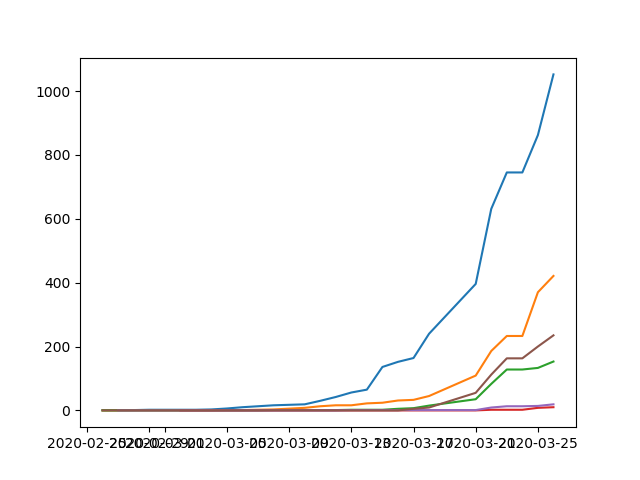

In [84]:
import matplotlib.pyplot as plt 
%matplotlib notebook
import seaborn as sns


def plotCases(d):
    plt.plot('dates', 'cases', data=d,label='Casos')
#     plt.xticks(d['dates'].to_string(),d['dates'], rotation=45)
  
    
# sns.lineplot(x='dates',y='cases',data=CE)
# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))
# for (i,j,ii) in zip([SP,RJ,MG],['SP','RJ','MG'],np.arange(3)):
# #     ax[ii].plot('dates', 'cases', data=i,label='Casos')
#     ax[ii].plot('dates', 'deaths', data=i,label='Mortes')
# #     ax[ii].plot('dates', 'suspects', data=i,label='Suspeitos')
# #     ax[ii].plot('dates', 'refuses', data=i,label='Negativos')
#     ax[ii].set_title(j)
#     ax[ii].grid(True)
#     ax[ii].legend()
#     fig.autofmt_xdate()
for i in [SP,RJ,MG]:
    plotCases(i)
for i in [MA,RN,CE]:
    plotCases(i)

In [10]:
interesse = ['SP','RJ','CE','RN','MA','MG']
usar = []

for i in GERAL:
    for ii in interesse:
        if ii in i:
            usar.append(i)


In [11]:
d9 = []
d11 = []

for i in usar:
    if len(i)==9:
        d9.append(i)
    else:
        d11.append(i)

In [12]:
["uf","state","cases","deaths","suspects","refuses","datetime"]

["uf","state","cases","deaths","suspects","refuses","broadcast","comments","datetime"]


['uf',
 'state',
 'cases',
 'deaths',
 'suspects',
 'refuses',
 'broadcast',
 'comments',
 'datetime']

In [13]:
print(np.array(d9)[:])
print(np.array(d11)[0])


[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
aux = np.array(requests.get('https://covid19-brazil-api.now.sh/api/report/v1/brazil/20200308').json()['data'])
list(aux[0].keys())

In [ ]:
col = list(aux[0].keys())[:-1]
data_aux = []

for i in aux:
    data_aux.append(np.array(list(i.values())[:-1]))

data_aux = pd.DataFrame(data=np.array(data_aux)[:,:-2],columns=col[:-2])    



for i in ['SP','RJ','CE','RN','MA','MG']:
    if data_aux[data_aux['uf']==i].to_numpy().shape[0]!=0:
        print(np.append(dt,data_aux[data_aux['uf']==i].to_numpy()[0]))

In [ ]:
np.array(GERAL).shape